In [ ]:
# Margaret Johnston
# Homework 6 - due 7 March

# Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler

In [ ]:
# Running the model with the original parameters

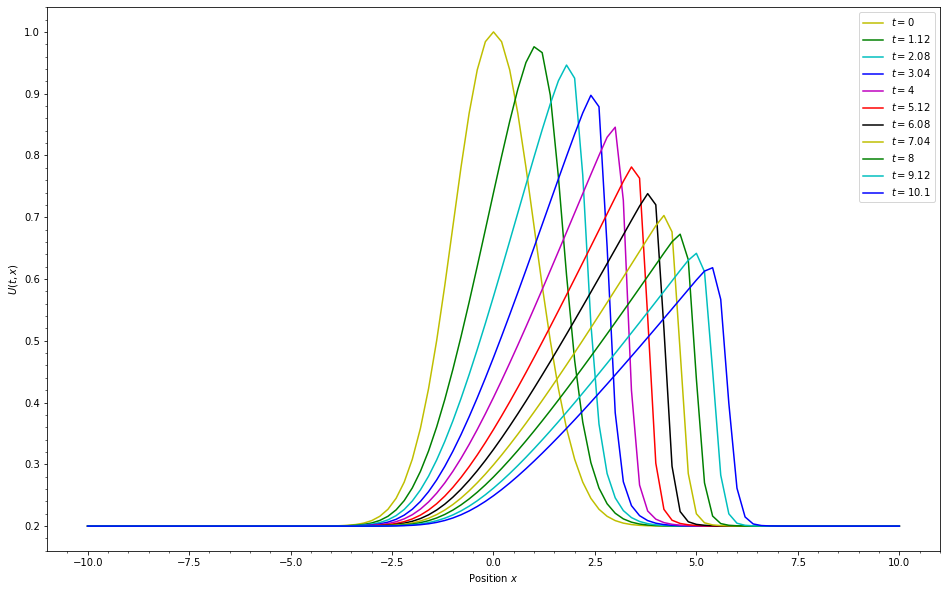

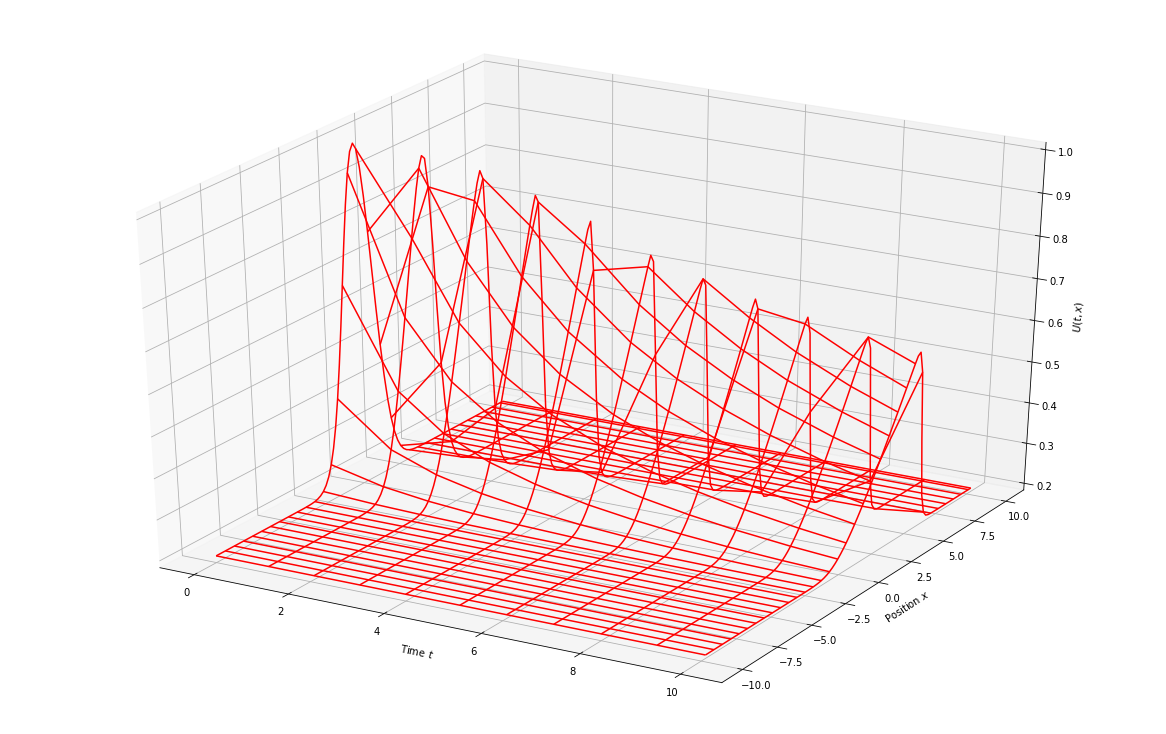

In [2]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
plt.rcParams['axes.prop_cycle'] = cycler(color='ygcbmrk')
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            U[ix]=Uold[ix]-(Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx 
        else:
            U[ix]=Uold[ix+1]-(Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
    
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        # print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

plt.show()

In [ ]:
# Running the model with different parameters

In [ ]:
# dx = 501
# dt = 1. * dx 
# tend = 20.0
# Each profile is smoother
# each profile has a sharp gradient on the right edge
# the profiles from t=5 onward are self similar

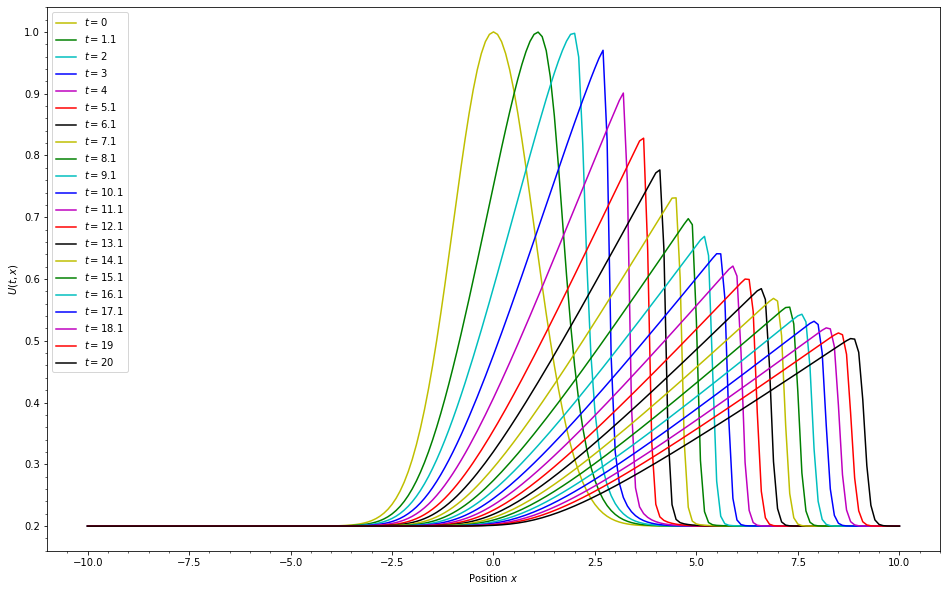

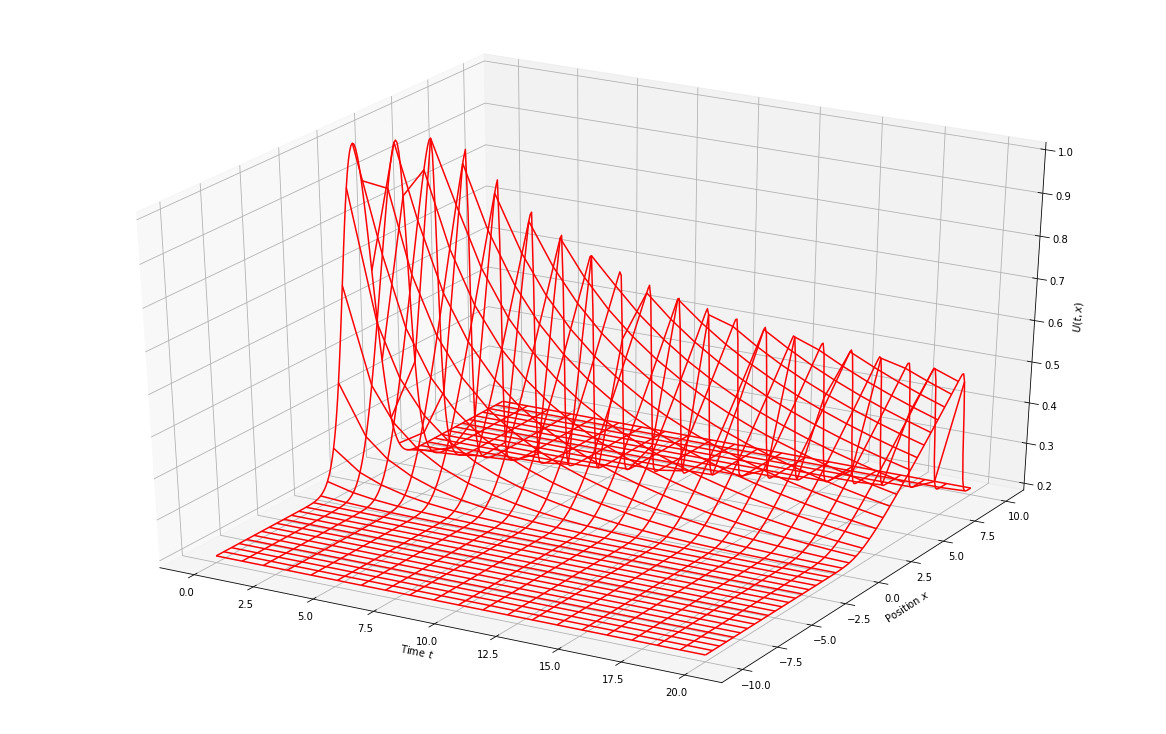

In [3]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 201      # number of grid points (including boundary)
tend = 20.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 1 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
plt.rcParams['axes.prop_cycle'] = cycler(color='ygcbmrk')
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            U[ix]=Uold[ix]-(Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx 
        else:
            U[ix]=Uold[ix+1]-(Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
    
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        # print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

plt.show()

3) Why does the solution develop from a symmetric form to an asymmetric one?

This occurs because the velocity at a particular point is the value of the function at that point. So the location of the peak has the largest velocity and therefore overtakes the side of the profile in the direction of the velocity. 

So for this Gaussian profile, because the values of the function are positive, the wave moves to the right . And, the peak has the largest magnitude and so skews the resulting profile to the right.